In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from scipy import stats
from pyreadstat import read_sav, set_value_labels
import matplotlib.pyplot as plt


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
sns.set_theme()

In [2]:
data, meta = read_sav("r29i_os_42.sav")

In [3]:
select_columns = [
    "yj10",     # wage
    "yj1.1.1",  # job satisfaction
    "yj4.1",    # job 
    "y_diplom", # education
    "yj260",    # foreign language
    "ym80",     # alcohol consumption
    "y_age",    # age
    "yj161.3y", # job experience
    "psu",      # region of residence 
    "yj6",      # number of subordinates
    "yj6.1a",   # work time
    "yj401.1a", # OK user
    "yj401.2a", # VK user
    "yj401.3a", # FaceBook user 
    "yj401.5a", # Twitter user 
    "yh5",      # sex
]

In [4]:
# Рассмотрим только работающих людей (data["yj1"] == 1) и отфильтруем данные с пропусками 

df_w = data[
    (data["yj1"] == 1) 
    & (data["yj10"] < 99999996) 
    & (data["yj1.1.1"] < 99999996) 
    & (data["yj4.1"] < 99999996)
    & (data["y_diplom"] < 99999996)
    & (data["yj260"] < 99999996)
    & (data["ym80"] < 99999996)
    & (data["y_age"] < 99999996)
    & (data["yj161.3y"] < 99999996)
    & (data["yj6"] < 99999996)
    & (data["yj6.1a"] < 99999996)
    & (data["psu"] < 99999996)
    & (data["yj401.1a"] < 99999996)
    & (data["yj401.2a"] < 99999996)
    & (data["yj401.3a"] < 99999996)
    & (data["yj401.5a"] < 99999996)
    & (data["yh5"] < 99999996)
    ][select_columns]


for col in ["yj4.1", "y_diplom", "yj260", "ym80", "psu", "yh5", "yj401.1a", "yj401.2a", "yj401.3a", "yj401.5a"]:
    df_w[col] = pd.Categorical(df_w[col])

In [5]:
df_w

,yj10,yj1.1.1,yj4.1,y_diplom,yj260,ym80,y_age,yj161.3y,psu,yj6,yj6.1a,yj401.1a,yj401.2a,yj401.3a,yj401.5a,yh5
4,30000.0,3.0,7.0,4.0,2.0,2.0,52.0,32.0,6.0,2.0,8.0,2.0,1.0,2.0,2.0,2.0
11,90000.0,2.0,10.0,6.0,1.0,1.0,44.0,21.0,6.0,2.0,9.0,2.0,1.0,2.0,2.0,2.0
12,29500.0,4.0,17.0,4.0,2.0,1.0,57.0,40.0,6.0,2.0,24.0,2.0,1.0,1.0,2.0,2.0
13,38000.0,2.0,17.0,4.0,2.0,1.0,51.0,28.0,6.0,2.0,24.0,2.0,2.0,2.0,2.0,1.0
14,11000.0,2.0,6.0,3.0,2.0,1.0,39.0,15.0,6.0,2.0,12.0,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12103,40000.0,2.0,28.0,6.0,2.0,2.0,27.0,2.0,3.0,2.0,12.0,1.0,1.0,1.0,1.0,2.0
12104,46000.0,1.0,13.0,6.0,2.0,1.0,26.0,6.0,3.0,2.0,24.0,2.0,1.0,2.0,2.0,2.0
12105,68000.0,2.0,13.0,6.0,1.0,1.0,48.0,28.0,3.0,1.0,8.0,2.0,1.0,2.0,2.0,2.0
12115,27000.0,2.0,11.0,6.0,2.0,1.0,59.0,36.0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,2.0


In [6]:
d = {"yj10":   "wage",
    "yj1.1.1": "job_satisfaction",
    "y_diplom": "education",
    "yj4.1": "job",
    "yj260": "foregin_lan",
    "ym80": "alc",
    "y_age": "age",
    "yj161.3y": "job_experience", 
    "yj6": "supervisor",
    "yj6.1a": "work_time",
    "yj401.1a": "ok",
    "yj401.2a": "vk",
    "yj401.3a": "facebook",
    "yj401.5a": "twitter",
    "yh5": "male"}

df_tmp = df_w.rename(columns = d)

In [7]:
df_tmp.describe()

,wage,job_satisfaction,age,job_experience,supervisor,work_time
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,33351.710235,2.171910,41.235711,18.191848,1.795747,9.564023
std,22628.953881,0.766456,11.067463,11.340748,0.403244,3.964995
min,3000.000000,1.000000,18.000000,0.000000,1.000000,2.000000
25%,20000.000000,2.000000,33.000000,9.000000,2.000000,8.000000
50%,29000.000000,2.000000,40.000000,16.000000,2.000000,8.000000
75%,40000.000000,3.000000,49.000000,26.000000,2.000000,10.000000
max,260000.000000,5.000000,80.000000,55.000000,2.000000,24.000000


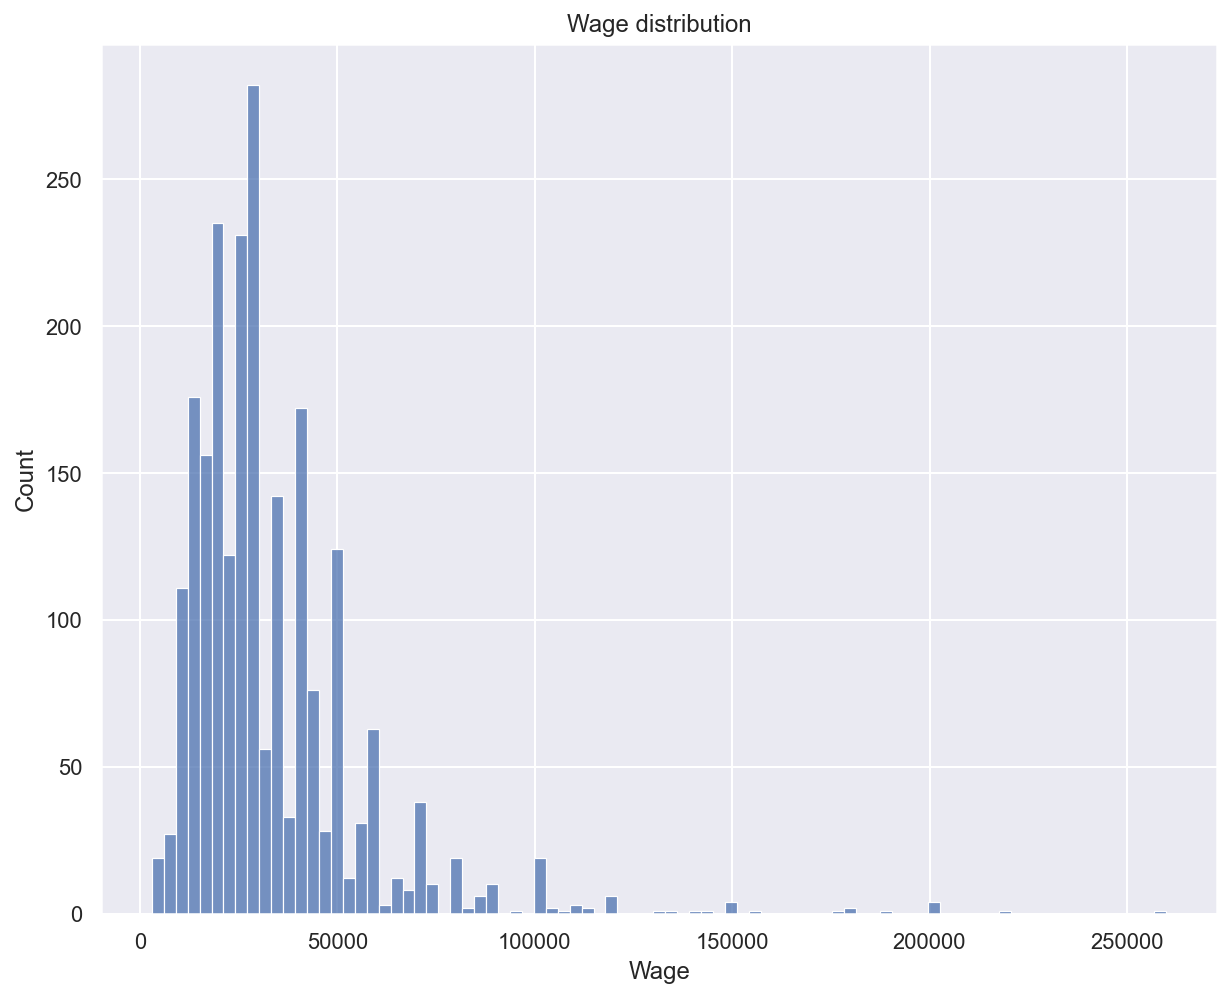

In [10]:
sns.set(rc={'figure.figsize':(10,8)})

sns.histplot(df_tmp["wage"])
plt.xlabel("Wage")
plt.title("Wage distribution")
plt.savefig('Wage distribution.png')

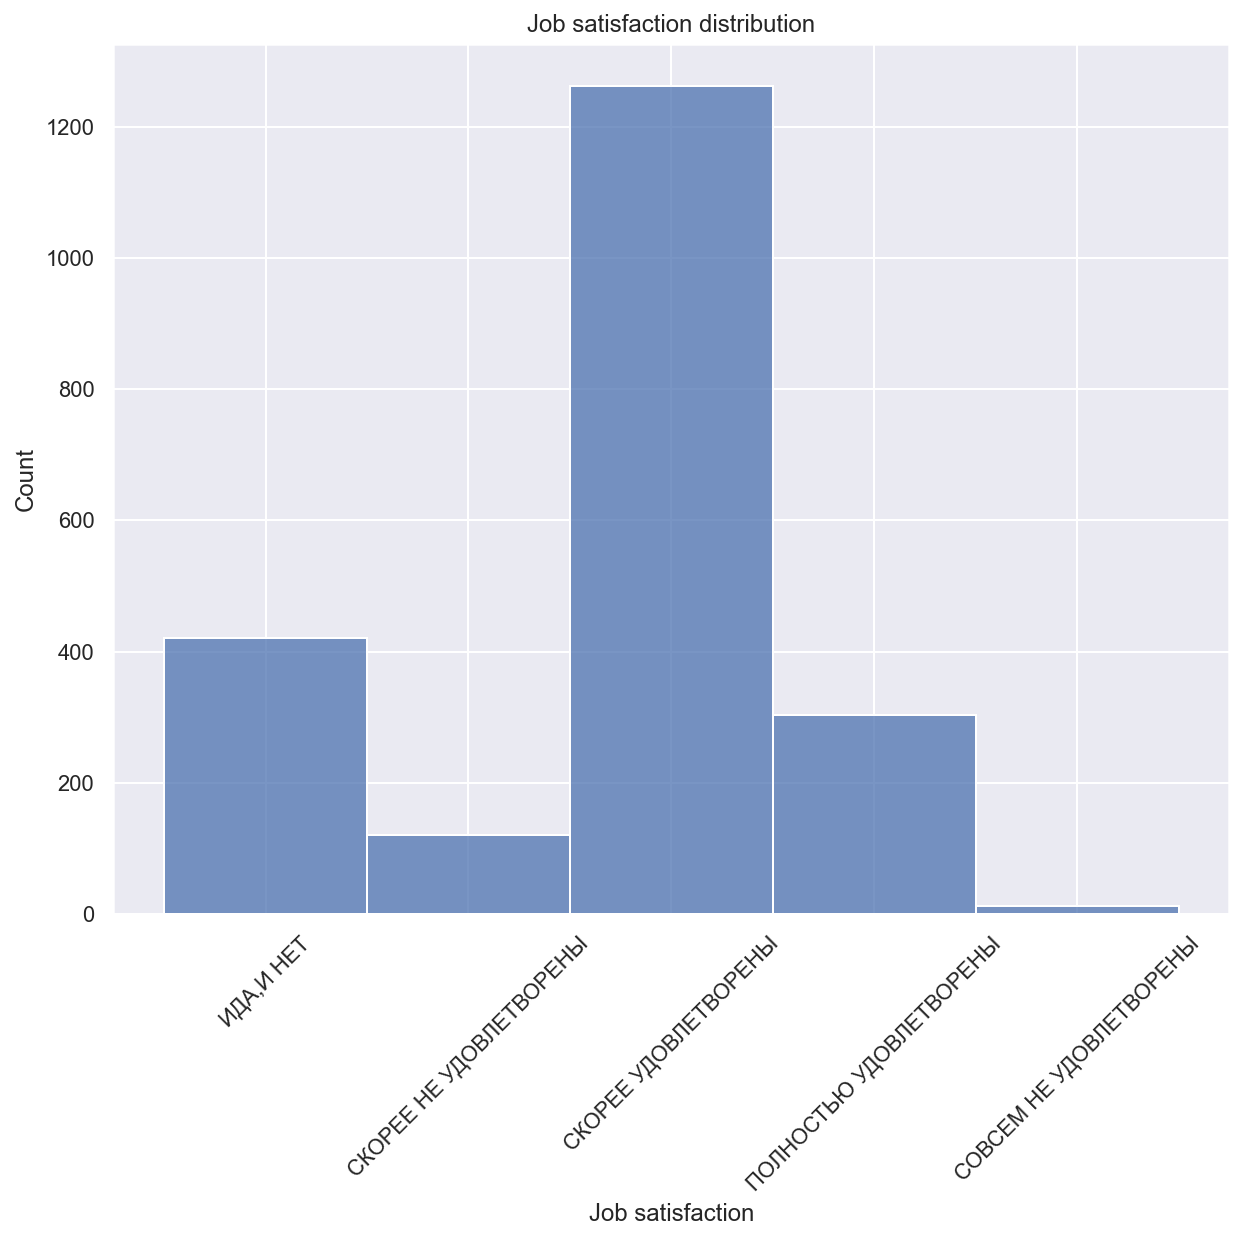

In [23]:
sns.set(rc={'figure.figsize':(10,8)})

df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]
di = {1: "ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ",
      2: "СКОРЕЕ УДОВЛЕТВОРЕНЫ",
      3: "ИДА,И НЕТ",
      4: "СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ",
      5: "СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ"}
df_tmp_1 = df_tmp_1.replace({"job_satisfaction": di})


sns.histplot(df_tmp_1["job_satisfaction"])
plt.xlabel("Job satisfaction")
plt.xticks(rotation=45)
plt.title("Job satisfaction distribution")
plt.savefig('Job satisfaction distribution.png')

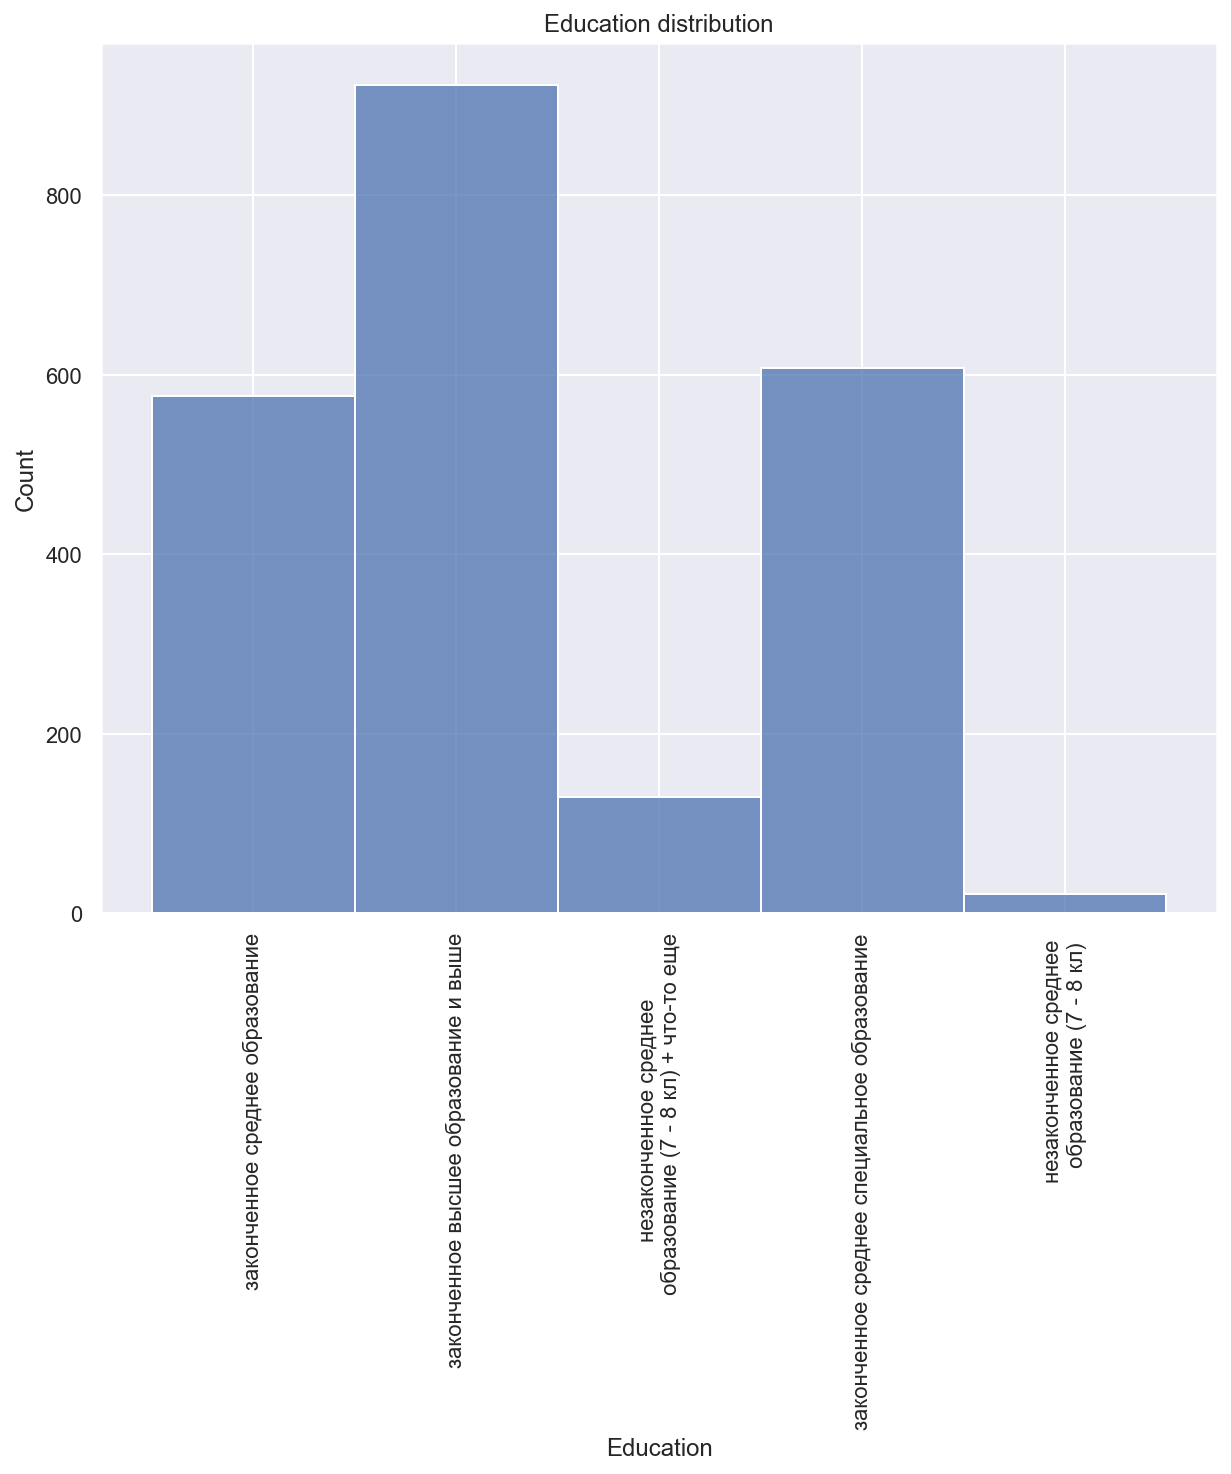

In [25]:
sns.set(rc={'figure.figsize':(10,8)})

df_tmp_1 = df_tmp[df_tmp["wage"] > -70000]
di = {1: "окончил 0 - 6 классов",
      2: "незаконченное среднее \n образование (7 - 8 кл)",
      3: "незаконченное среднее \n образование (7 - 8 кл) + что-то еще",
      4: "законченное среднее образование",
      5: "законченное среднее специальное образование",
      6: "законченное высшее образование и выше"
     }
df_tmp_1 = df_tmp_1.replace({"education": di})


sns.histplot(df_tmp_1["education"])
plt.xlabel("Education")
plt.xticks(rotation=90)
plt.title("Education distribution")
plt.savefig('Education distribution.png')

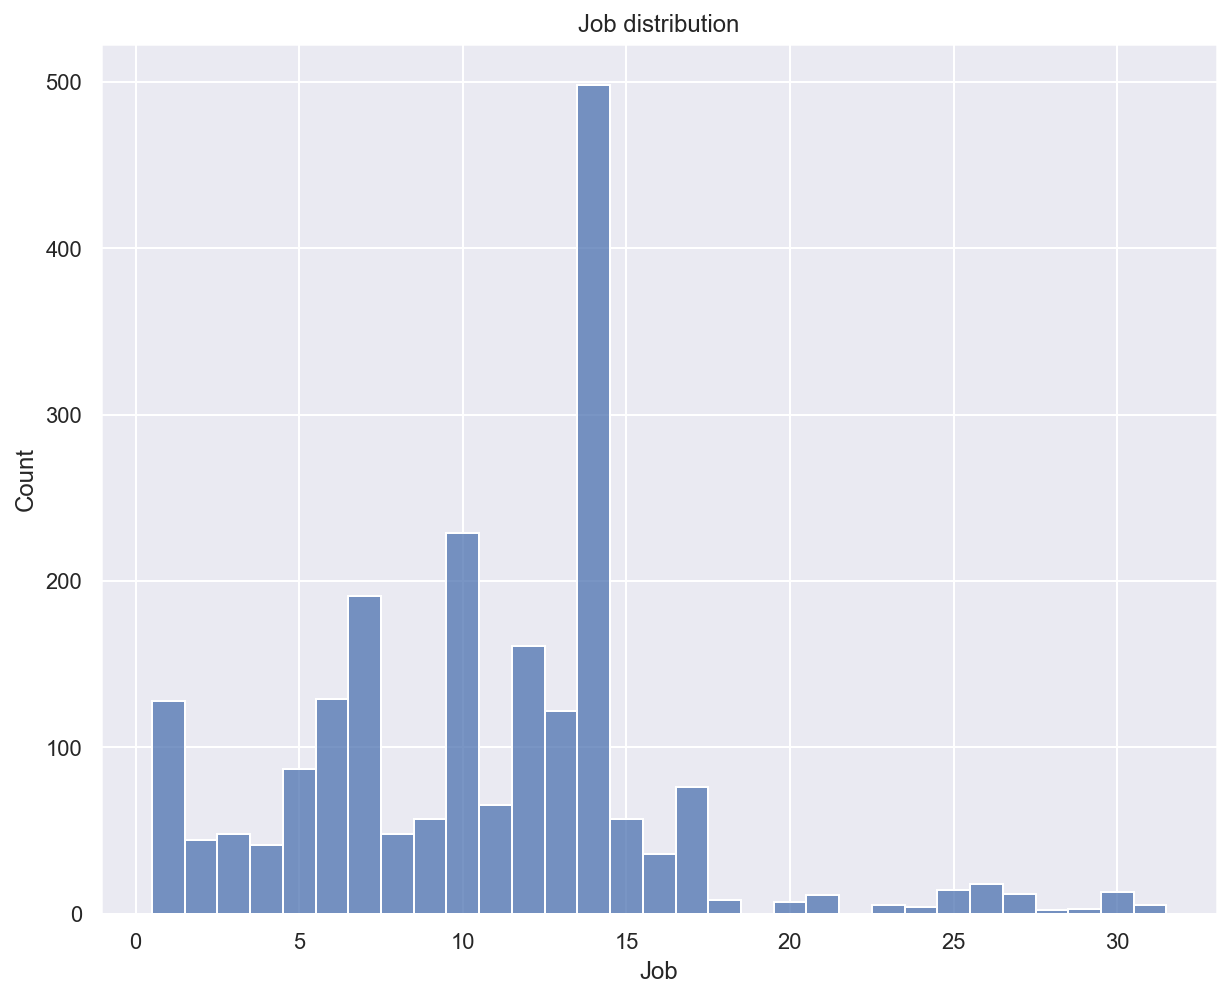

In [31]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]
sns.histplot(df_tmp_1["job"].cat.as_ordered())
plt.xlabel("Job")
plt.xticks(rotation=0)
plt.title("Job distribution")
plt.savefig('Job distribution.png')

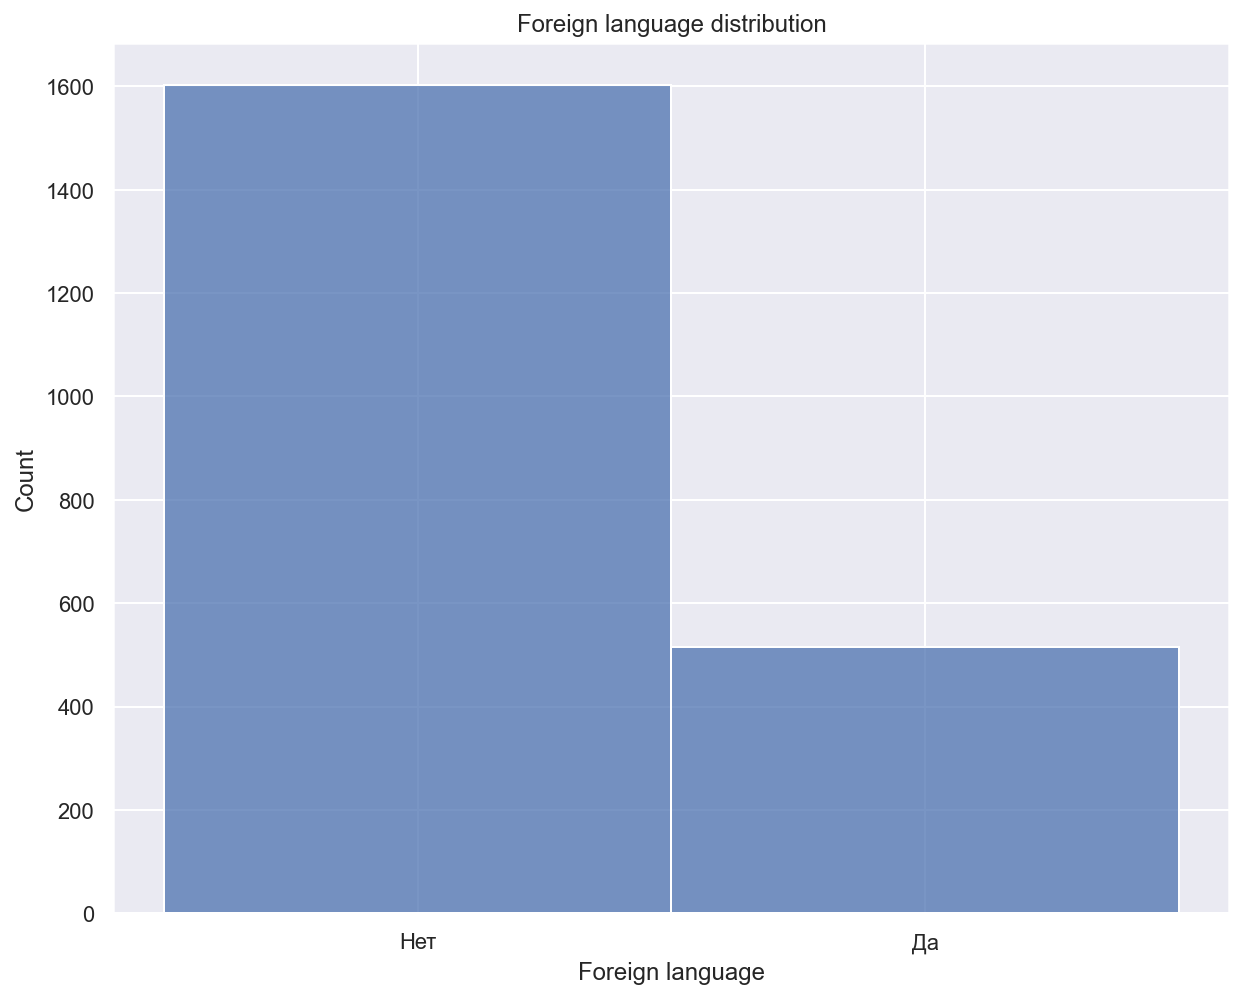

In [40]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

di = {1: "Да",
      2: "Нет",
     }
df_tmp_1 = df_tmp_1.replace({"foregin_lan": di})

sns.histplot(df_tmp_1["foregin_lan"], discrete = True)
plt.xlabel("Foreign language")
plt.xticks(rotation=0)
plt.title("Foreign language distribution")
plt.savefig('Foreign language distribution.png')

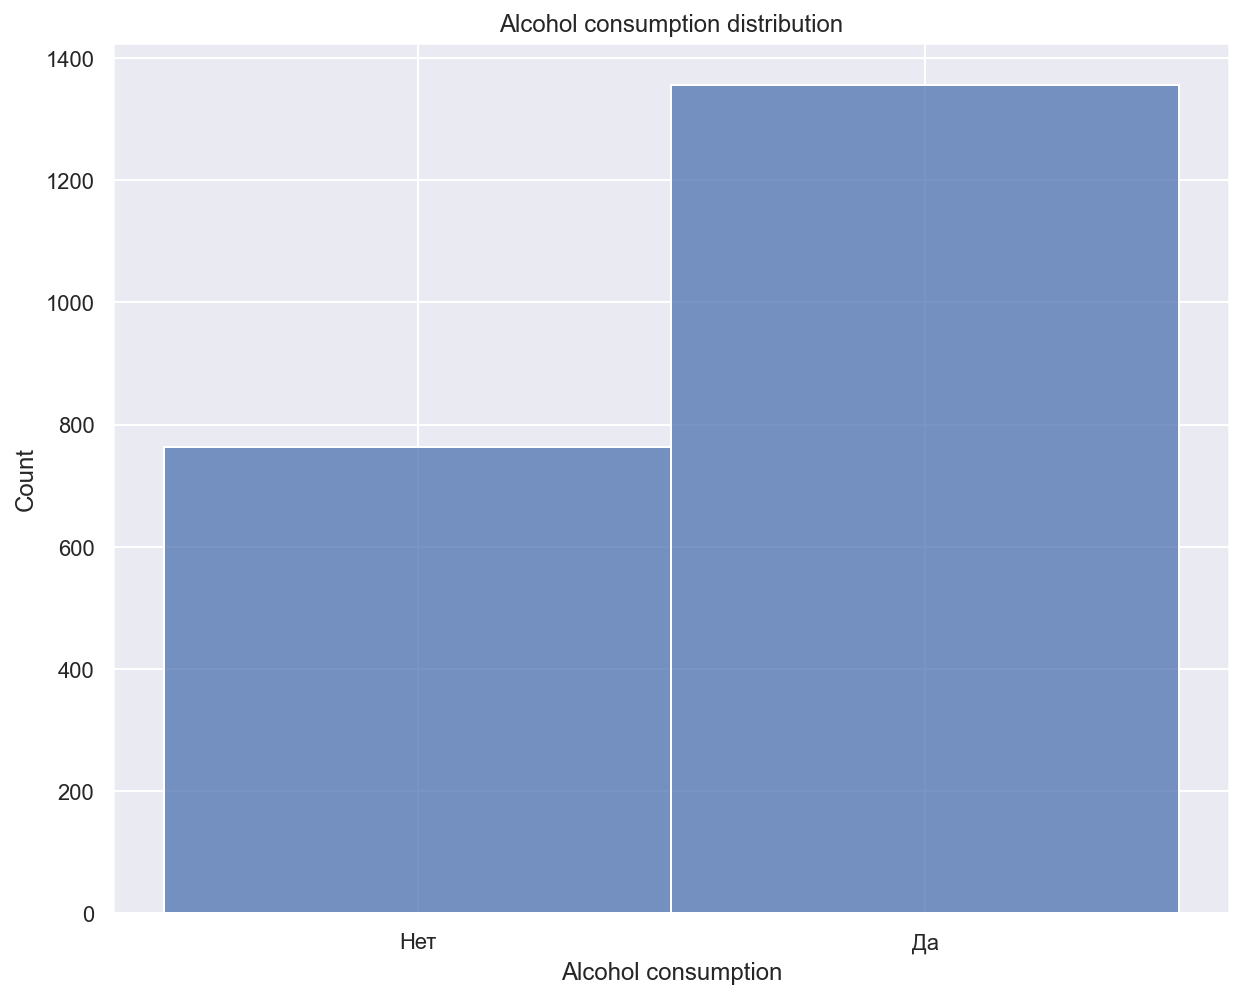

In [41]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

di = {1: "Да",
      2: "Нет",
     }
df_tmp_1 = df_tmp_1.replace({"alc": di})

sns.histplot(df_tmp_1["alc"], discrete = True)

plt.xlabel("Alcohol consumption")
plt.xticks(rotation=0)
plt.title("Alcohol consumption distribution")
plt.savefig('Alcohol consumption distribution.png')

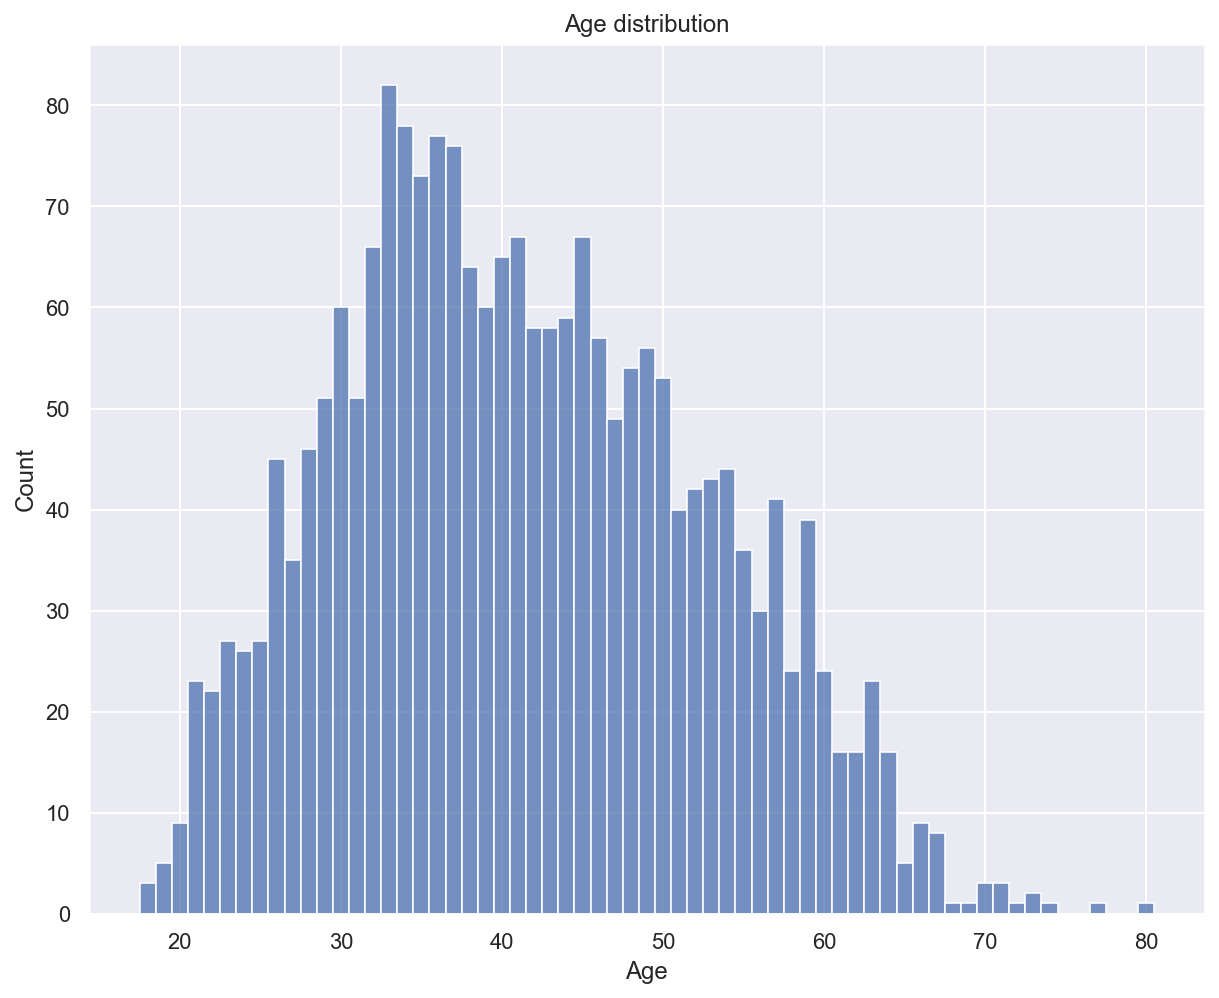

In [42]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

sns.histplot(df_tmp_1["age"], discrete = True)

plt.xlabel("Age")
plt.xticks(rotation=0)
plt.title("Age distribution")
plt.savefig('Age distribution.png')

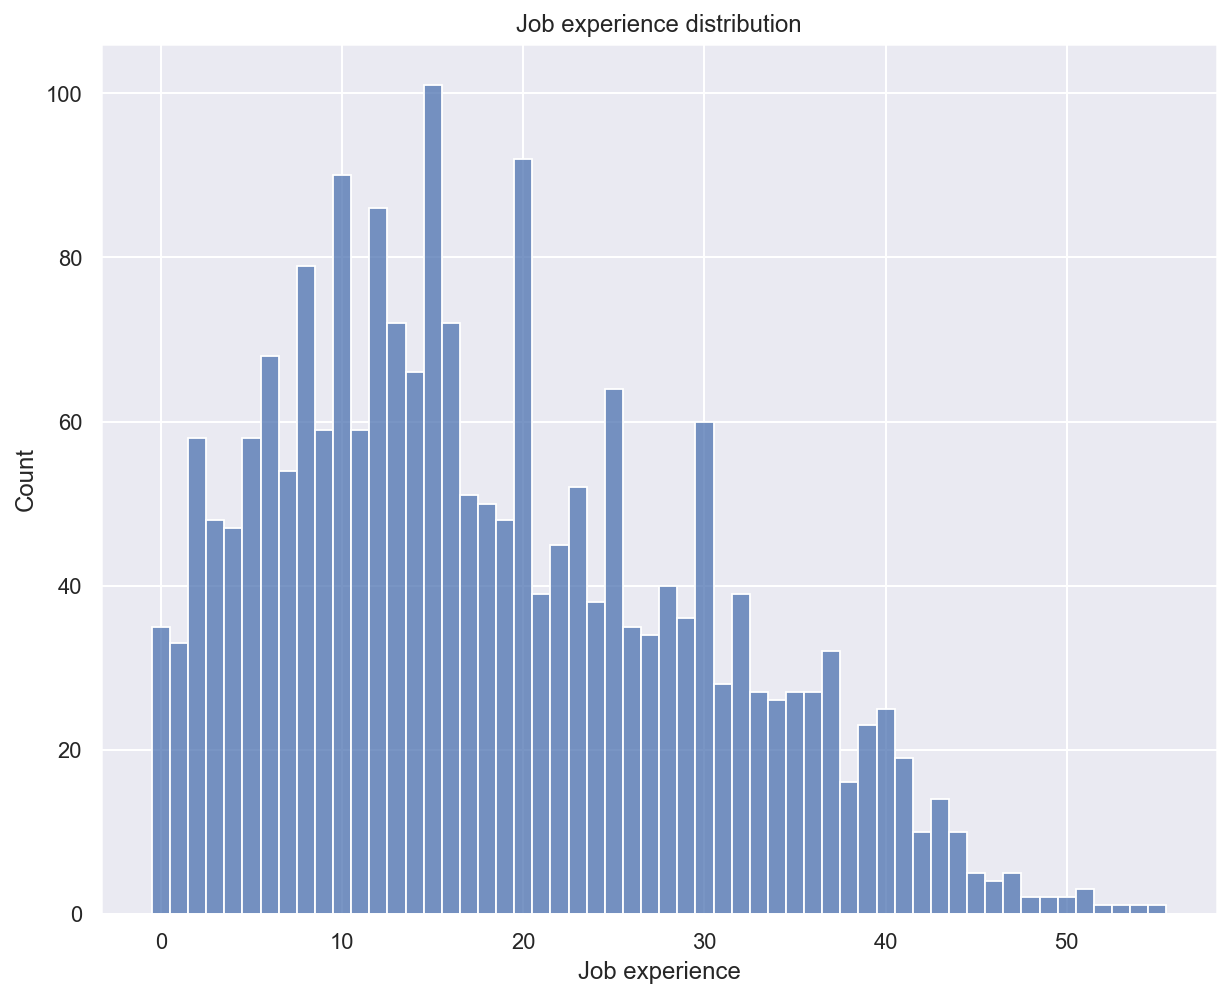

In [43]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

sns.histplot(df_tmp_1["job_experience"], discrete = True)

plt.xlabel("Job experience")
plt.xticks(rotation=0)
plt.title("Job experience distribution")
plt.savefig('Job experience distribution.png')

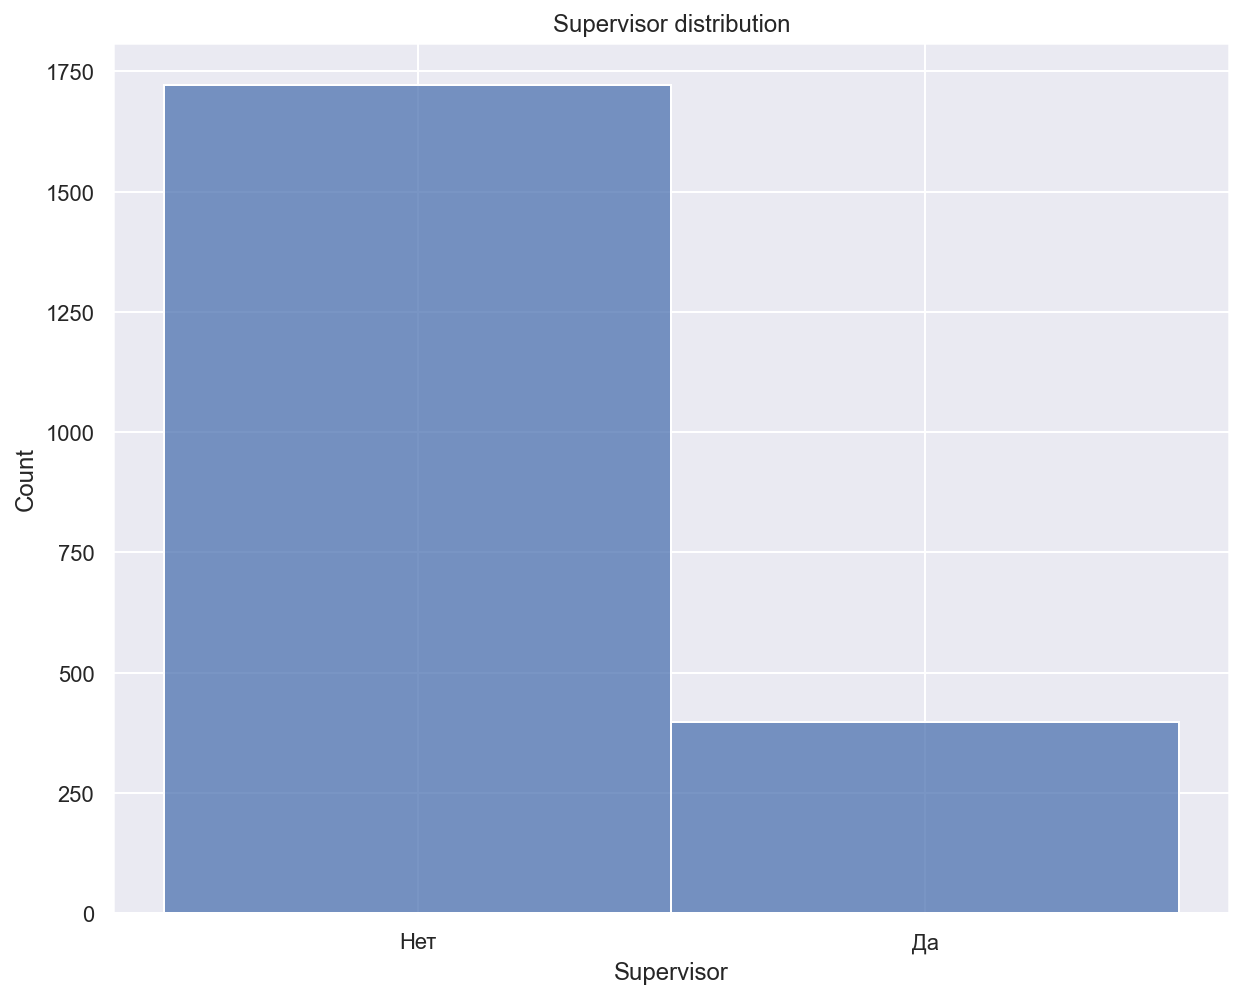

In [44]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]



di = {1: "Да",
      2: "Нет",
     }
df_tmp_1 = df_tmp_1.replace({"supervisor": di})

sns.histplot(df_tmp_1["supervisor"], discrete = True)

plt.xlabel("Supervisor")
plt.xticks(rotation=0)
plt.title("Supervisor distribution")
plt.savefig('Supervisor distribution.png')

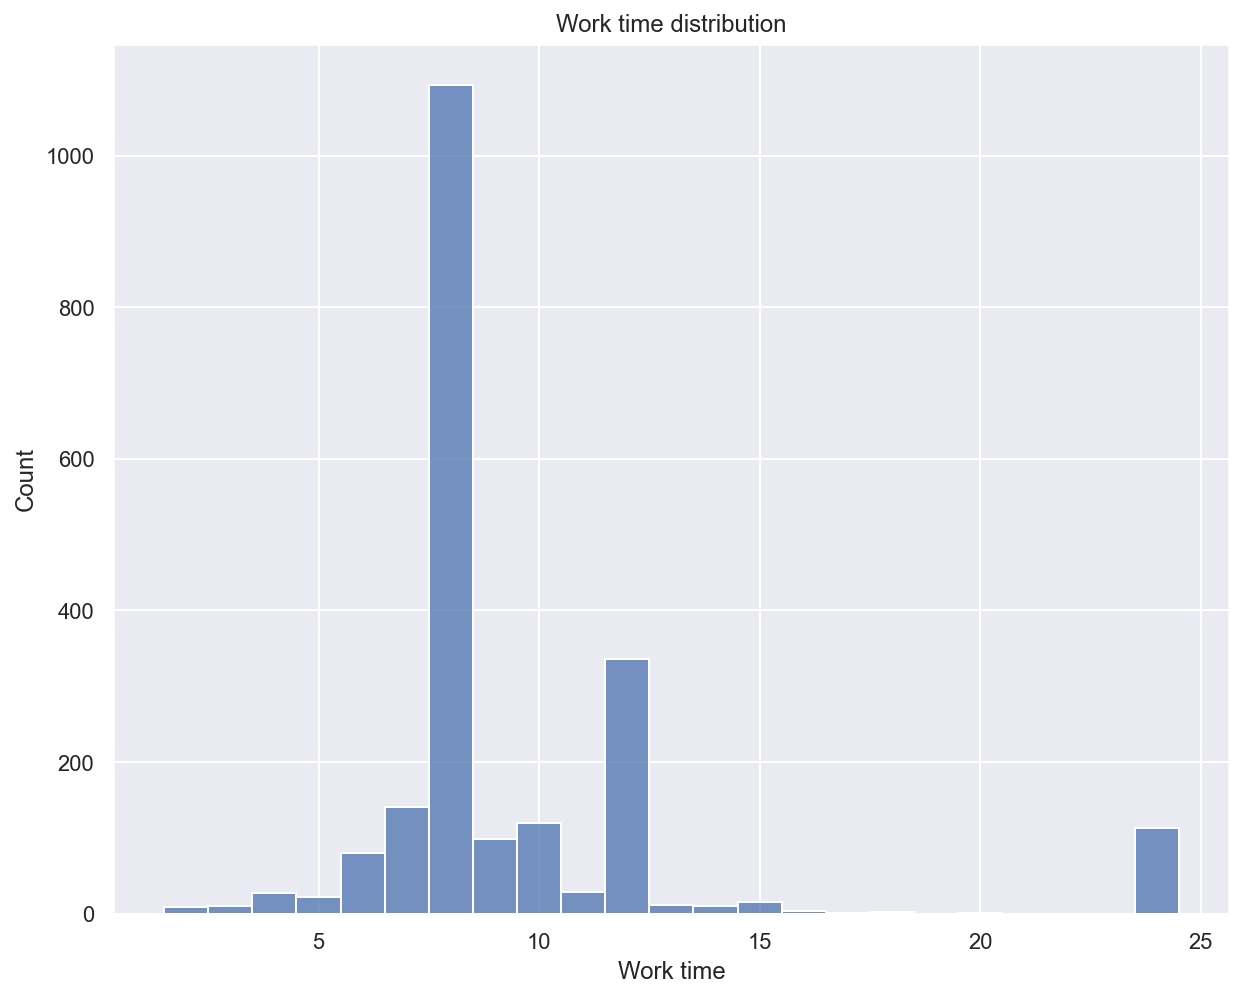

In [45]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

sns.histplot(df_tmp_1["work_time"], discrete = True)

plt.xlabel("Work time")
plt.xticks(rotation=0)
plt.title("Work time distribution")
plt.savefig('Work time distribution.png')

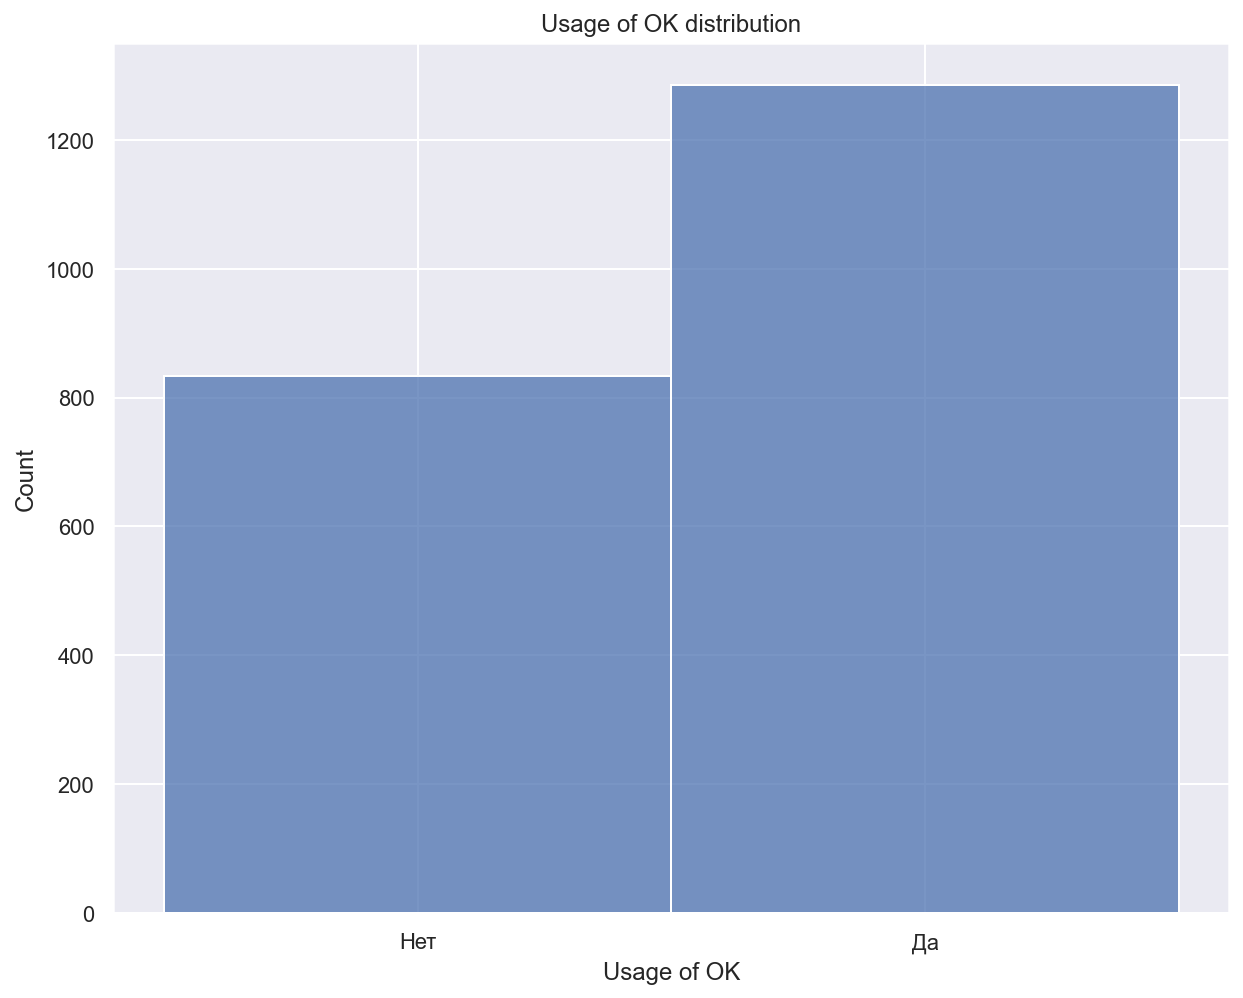

In [47]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

di = {1: "Да",
      2: "Нет",
     }
df_tmp_1 = df_tmp_1.replace({"ok": di})

sns.histplot(df_tmp_1["ok"], discrete = True)
plt.xlabel("Usage of OK")
plt.xticks(rotation=0)
plt.title("Usage of OK distribution")
plt.savefig('Usage of OK distribution.png')

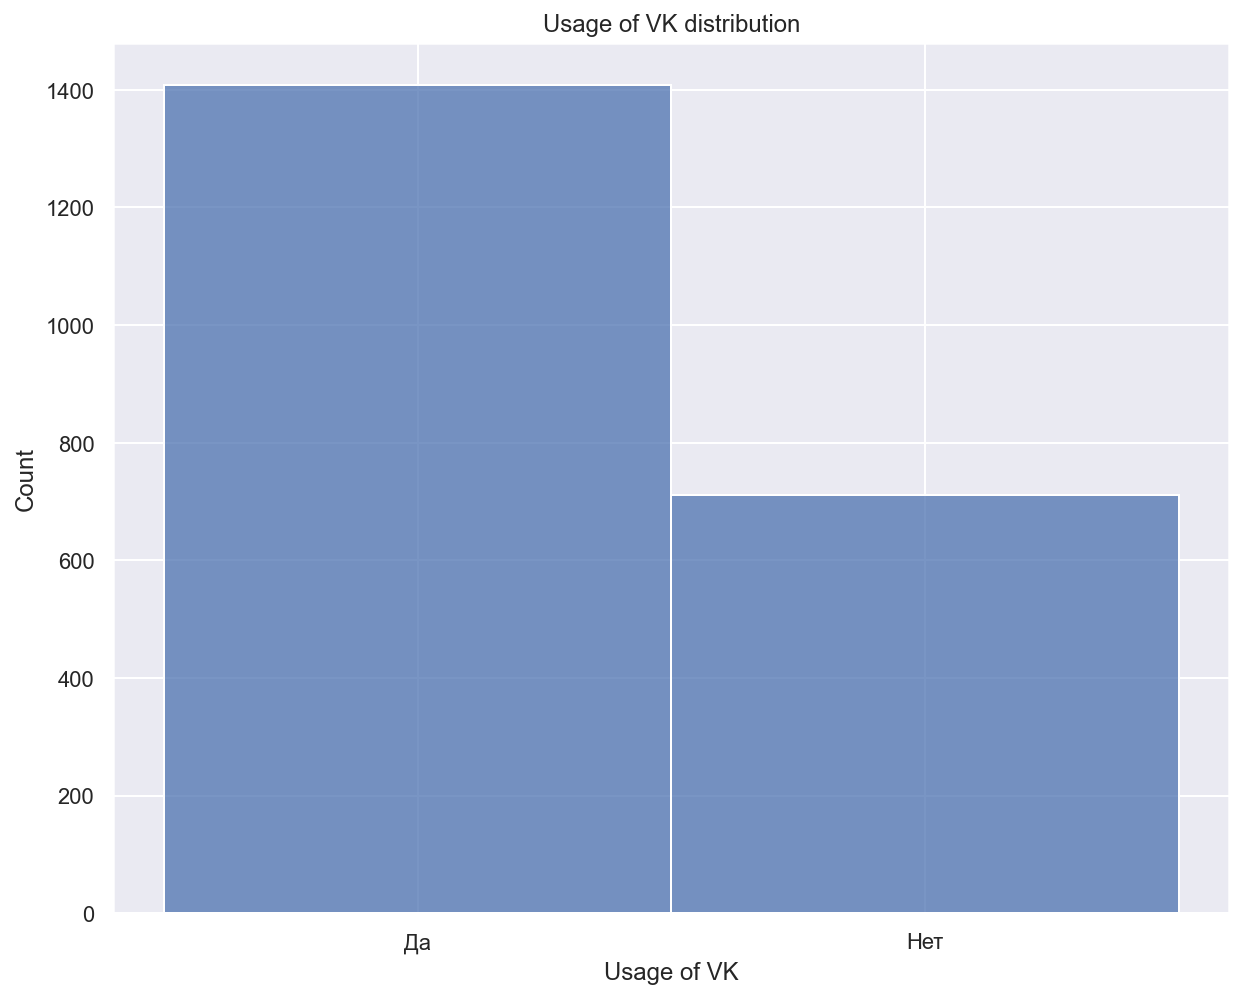

In [48]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

di = {1: "Да",
      2: "Нет",
     }
df_tmp_1 = df_tmp_1.replace({"vk": di})

sns.histplot(df_tmp_1["vk"], discrete = True)
plt.xlabel("Usage of VK")
plt.xticks(rotation=0)
plt.title("Usage of VK distribution")
plt.savefig('Usage of VK distribution.png')

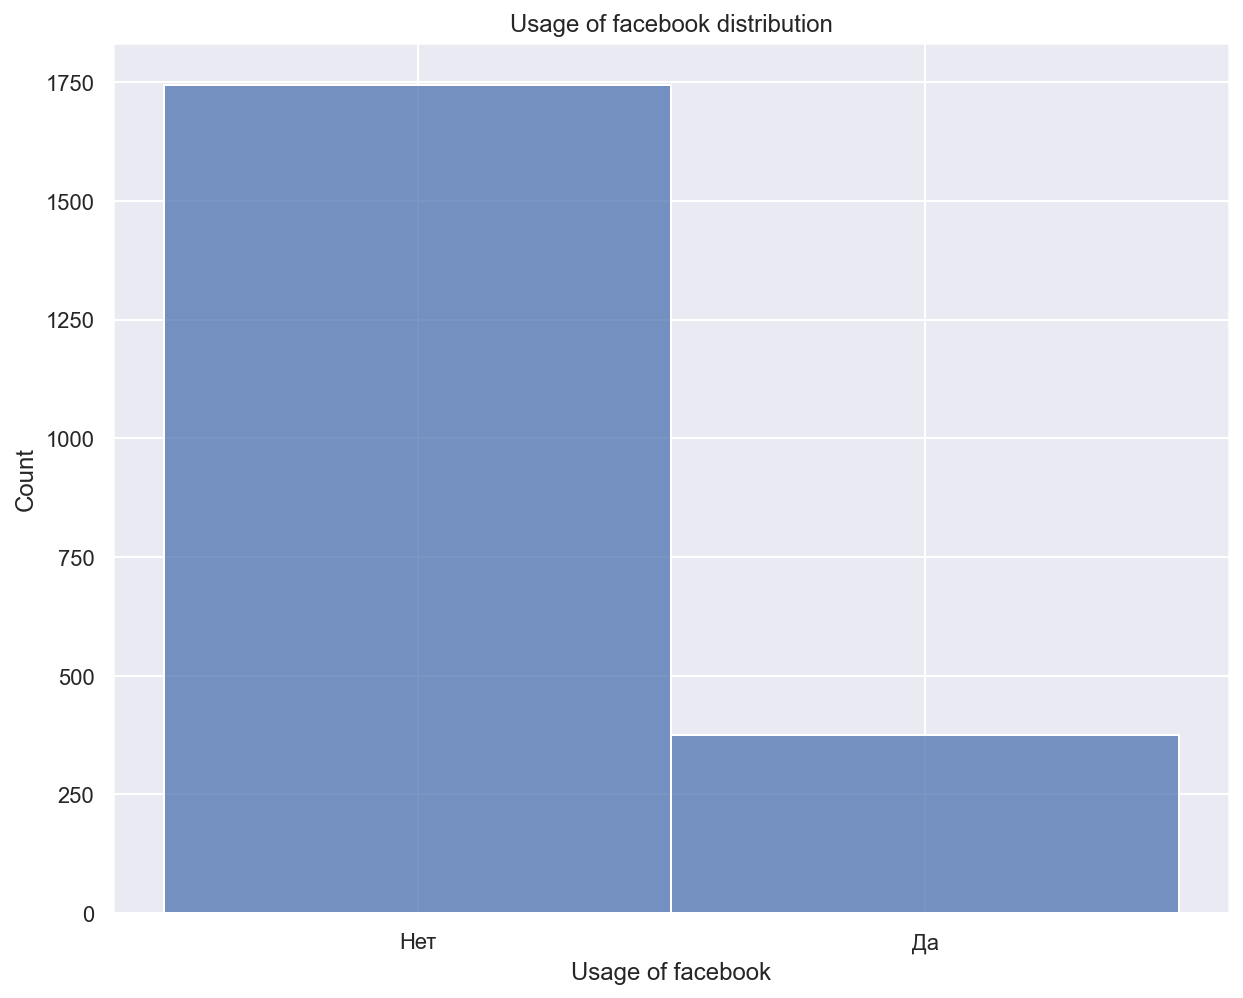

In [49]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

di = {1: "Да",
      2: "Нет",
     }
df_tmp_1 = df_tmp_1.replace({"facebook": di})

sns.histplot(df_tmp_1["facebook"], discrete = True)
plt.xlabel("Usage of facebook")
plt.xticks(rotation=0)
plt.title("Usage of facebook distribution")
plt.savefig('Usage of facebook distribution.png')

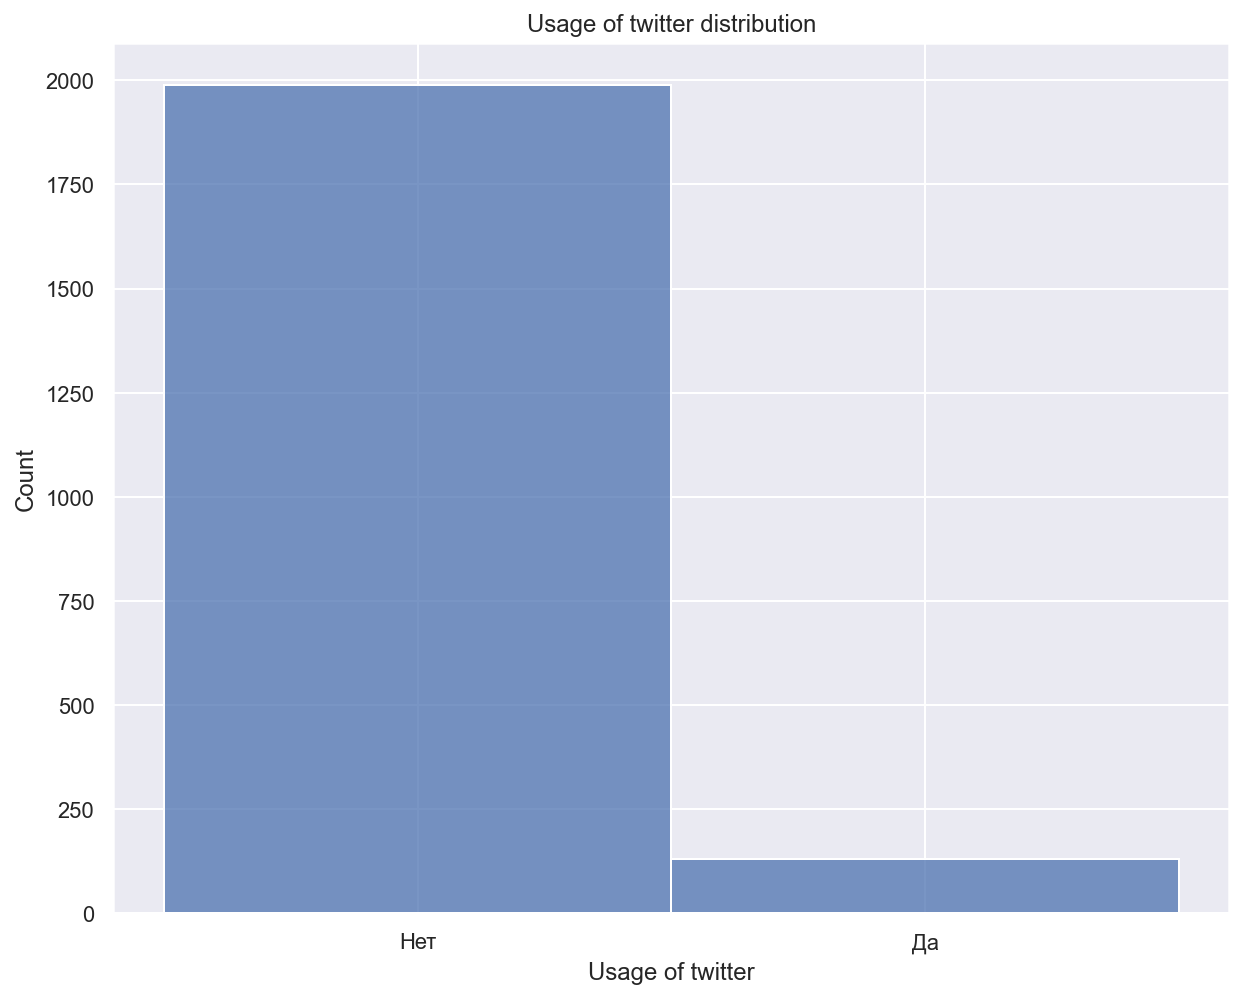

In [50]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

di = {1: "Да",
      2: "Нет",
     }
df_tmp_1 = df_tmp_1.replace({"twitter": di})

sns.histplot(df_tmp_1["twitter"], discrete = True)
plt.xlabel("Usage of twitter")
plt.xticks(rotation=0)
plt.title("Usage of twitter distribution")
plt.savefig('Usage of twitter distribution.png')

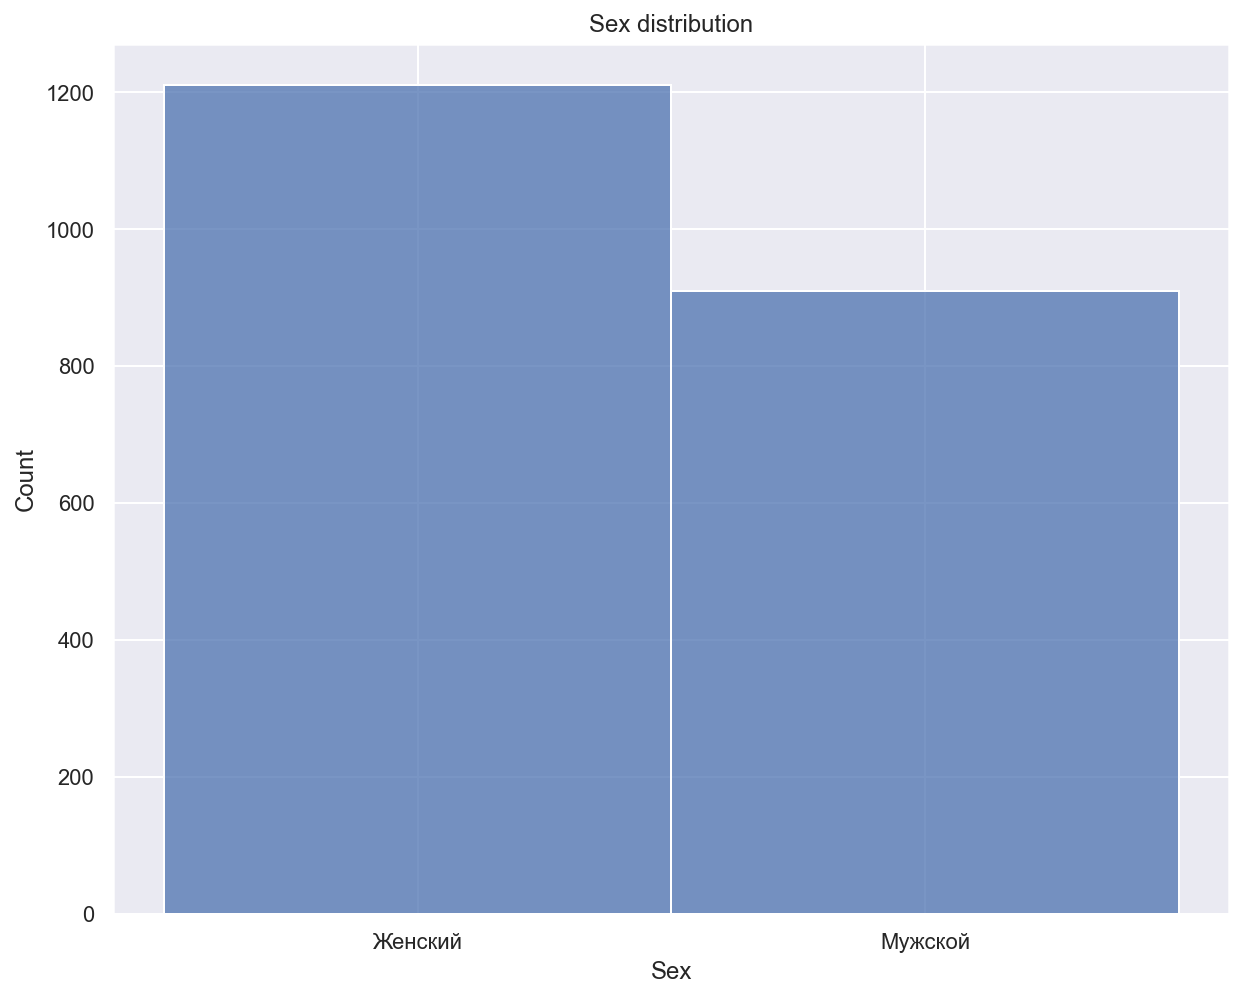

In [52]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]

di = {1: "Мужской",
      2: "Женский",
     }
df_tmp_1 = df_tmp_1.replace({"male": di})

sns.histplot(df_tmp_1["male"], discrete = True)
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.title("Sex distribution")
plt.savefig('Sex distribution.png')

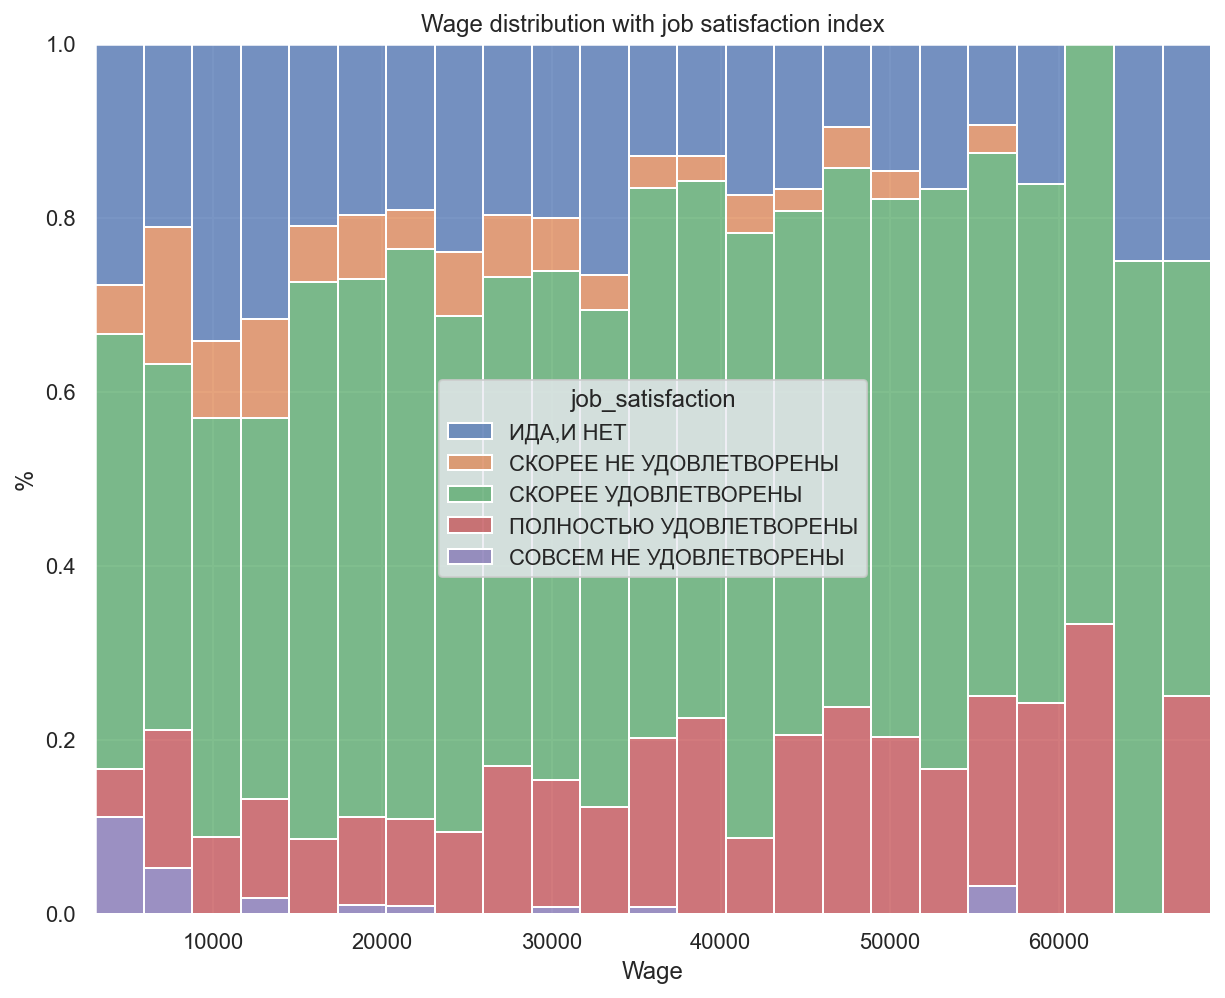

In [56]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 70000]
di = {1: "ПОЛНОСТЬЮ УДОВЛЕТВОРЕНЫ",
      2: "СКОРЕЕ УДОВЛЕТВОРЕНЫ",
      3: "ИДА,И НЕТ",
      4: "СКОРЕЕ НЕ УДОВЛЕТВОРЕНЫ",
      5: "СОВСЕМ НЕ УДОВЛЕТВОРЕНЫ"}
df_tmp_1 = df_tmp_1.replace({"job_satisfaction": di})

sns.histplot(data=df_tmp_1, x="wage", hue="job_satisfaction", multiple="fill")
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with job satisfaction index")
plt.savefig('1. Wage distribution with job satisfaction index.png')

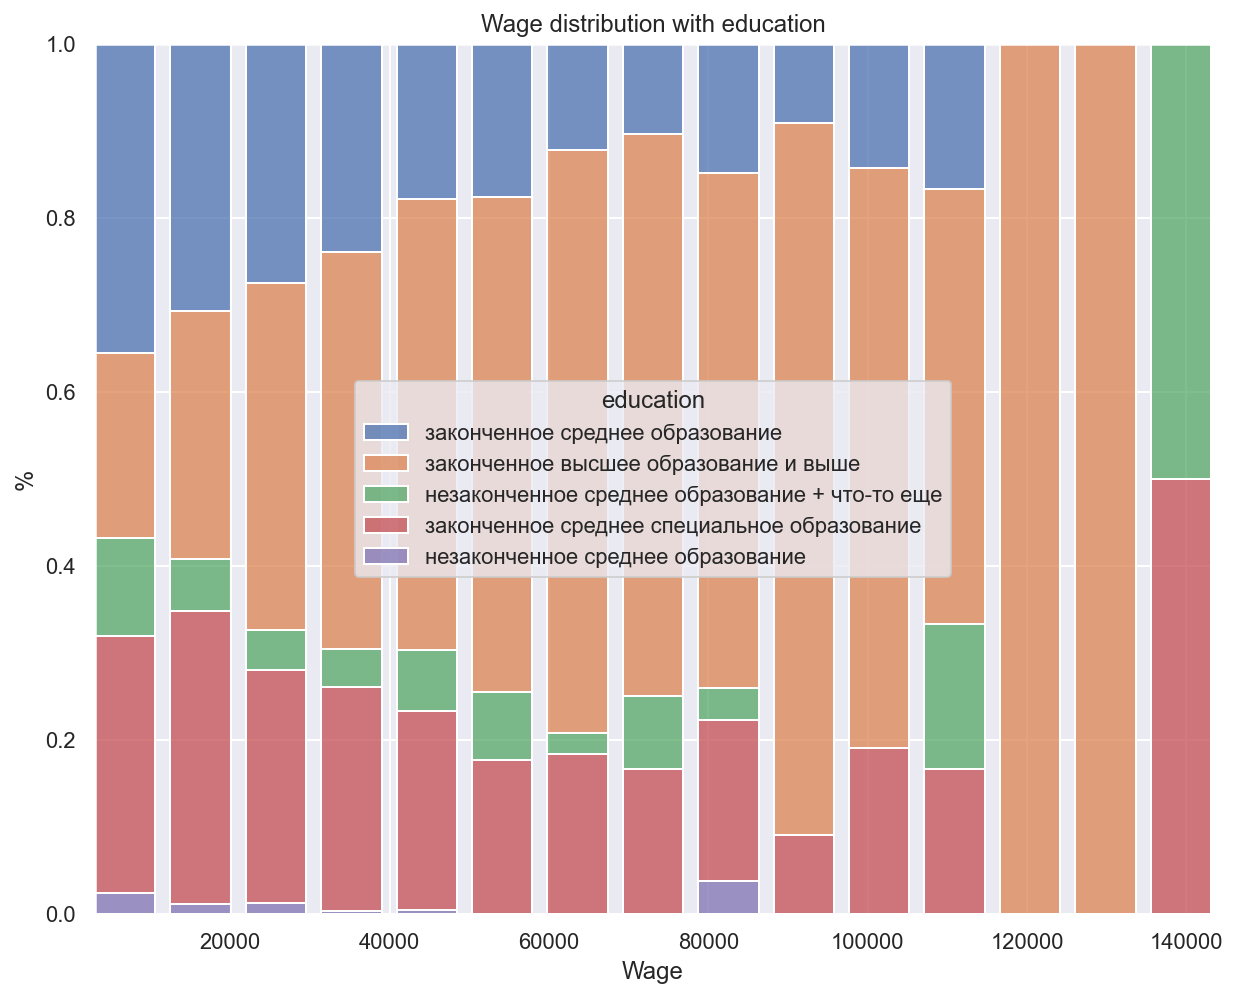

In [57]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 150000]

di = {1: "0-6 классов",
      2: "незаконченное среднее образование",
      3: "незаконченное среднее образование + что-то еще",
      4: "законченное среднее образование",
      5: "законченное среднее специальное образование",
      6: "законченное высшее образование и выше"}
df_tmp_1 = df_tmp_1.replace({"education": di})

sns.histplot(data=df_tmp_1, x="wage", hue="education", multiple="fill", shrink=.8, bins=15)
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with education")
plt.savefig('2. Wage distribution with education.png')

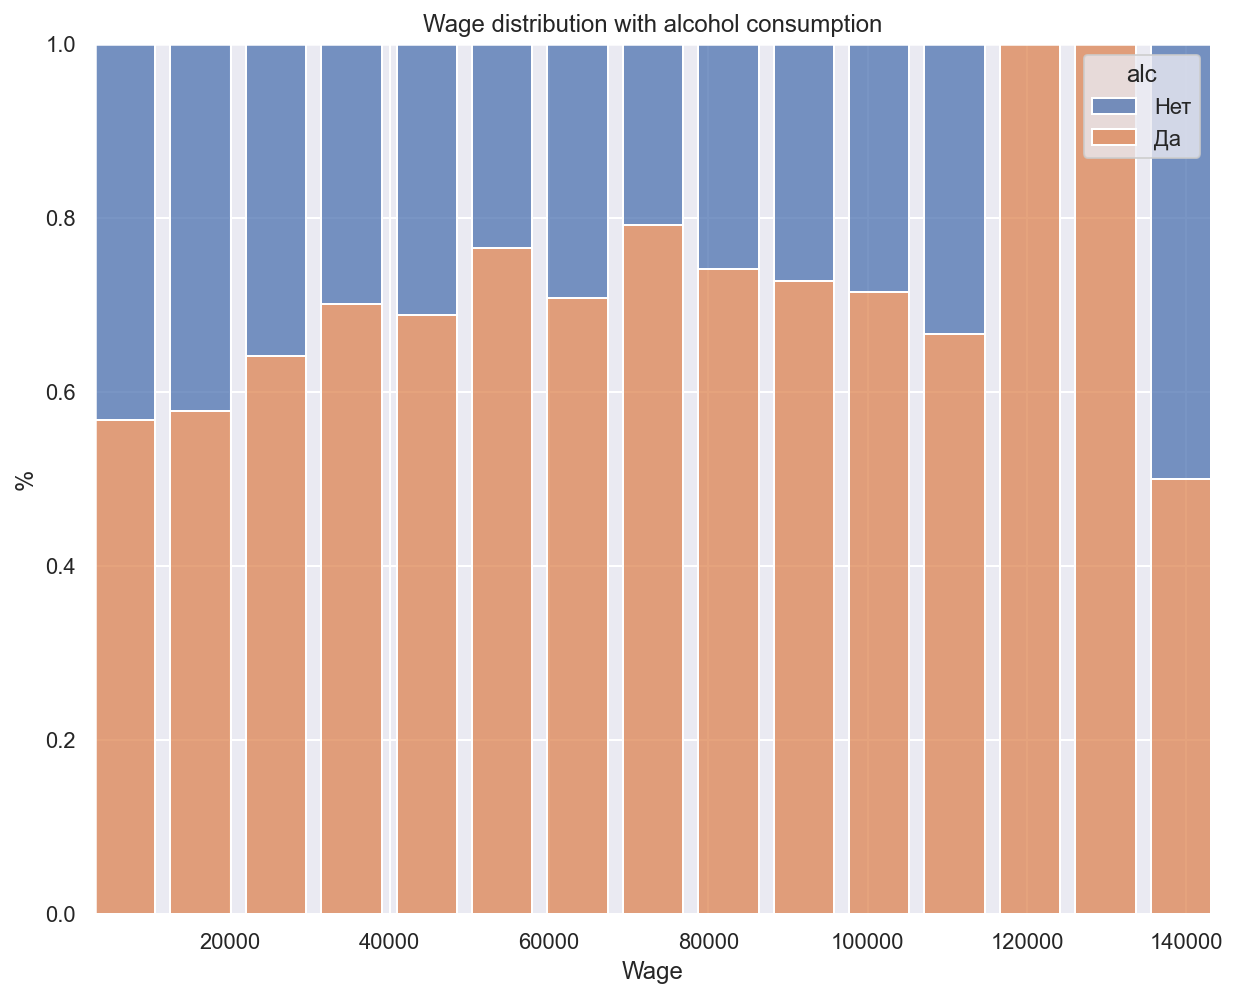

In [59]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 150000]

di = {1: "Да",
      2: "Нет"}
df_tmp_1 = df_tmp_1.replace({"alc": di})

sns.histplot(data=df_tmp_1, x="wage", hue="alc", multiple="fill", shrink=.8, bins=15)
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with alcohol consumption")
plt.savefig('2. Wage distribution with alcohol consumption.png')

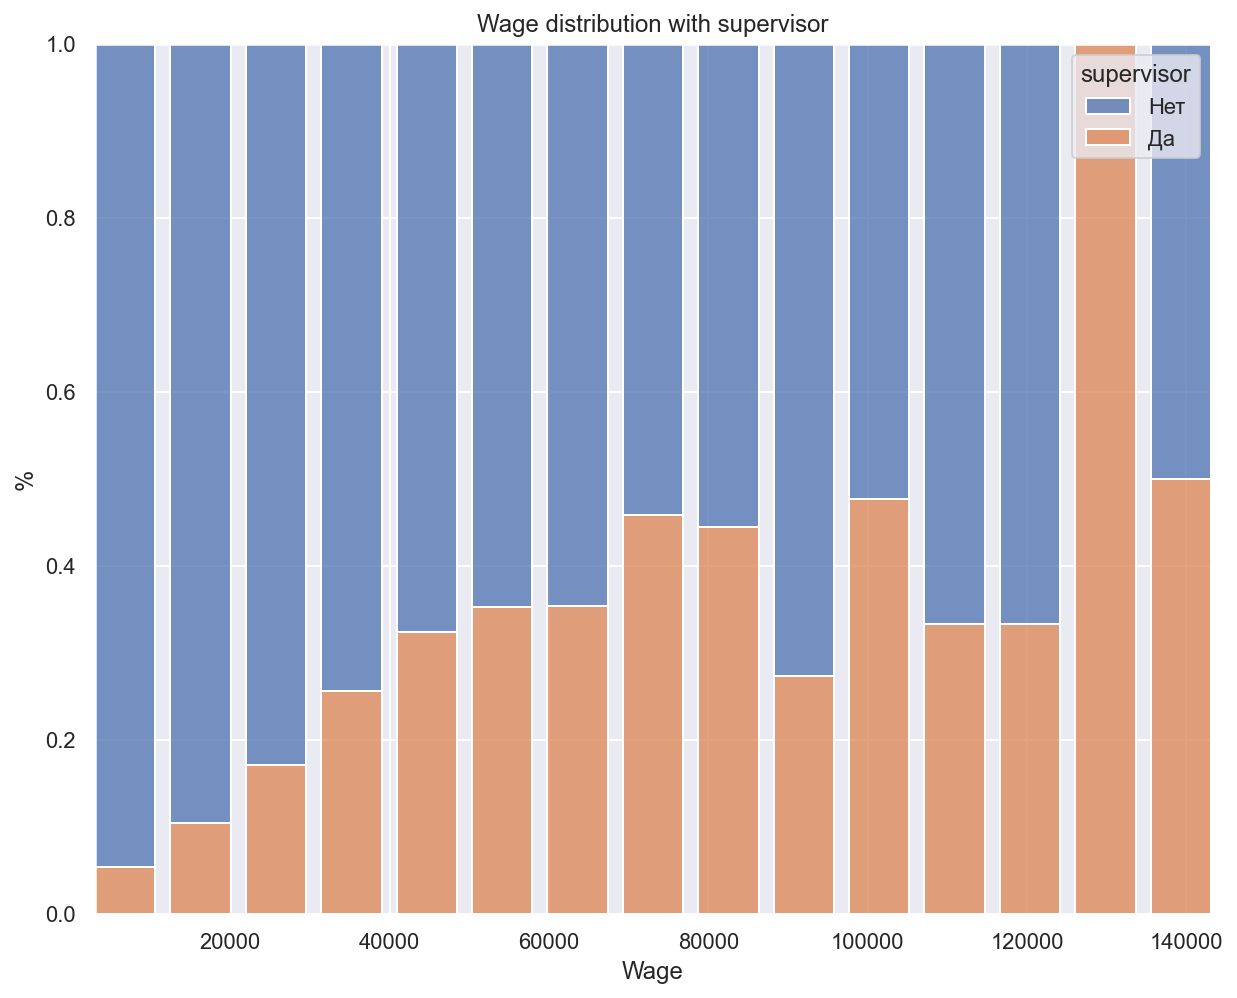

In [64]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 150000]

di = {1: "Да",
      2: "Нет"}
df_tmp_1 = df_tmp_1.replace({"supervisor": di})

sns.histplot(data=df_tmp_1, x="wage", hue="supervisor", multiple="fill", shrink=.8, bins=15)
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with supervisor")
plt.savefig('2. Wage distribution with supervisor.png')

<ipython-input-66-5a2f398bef0c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_1["job_experience"] = df_tmp["job_experience"].apply(lambda s: fff(s))


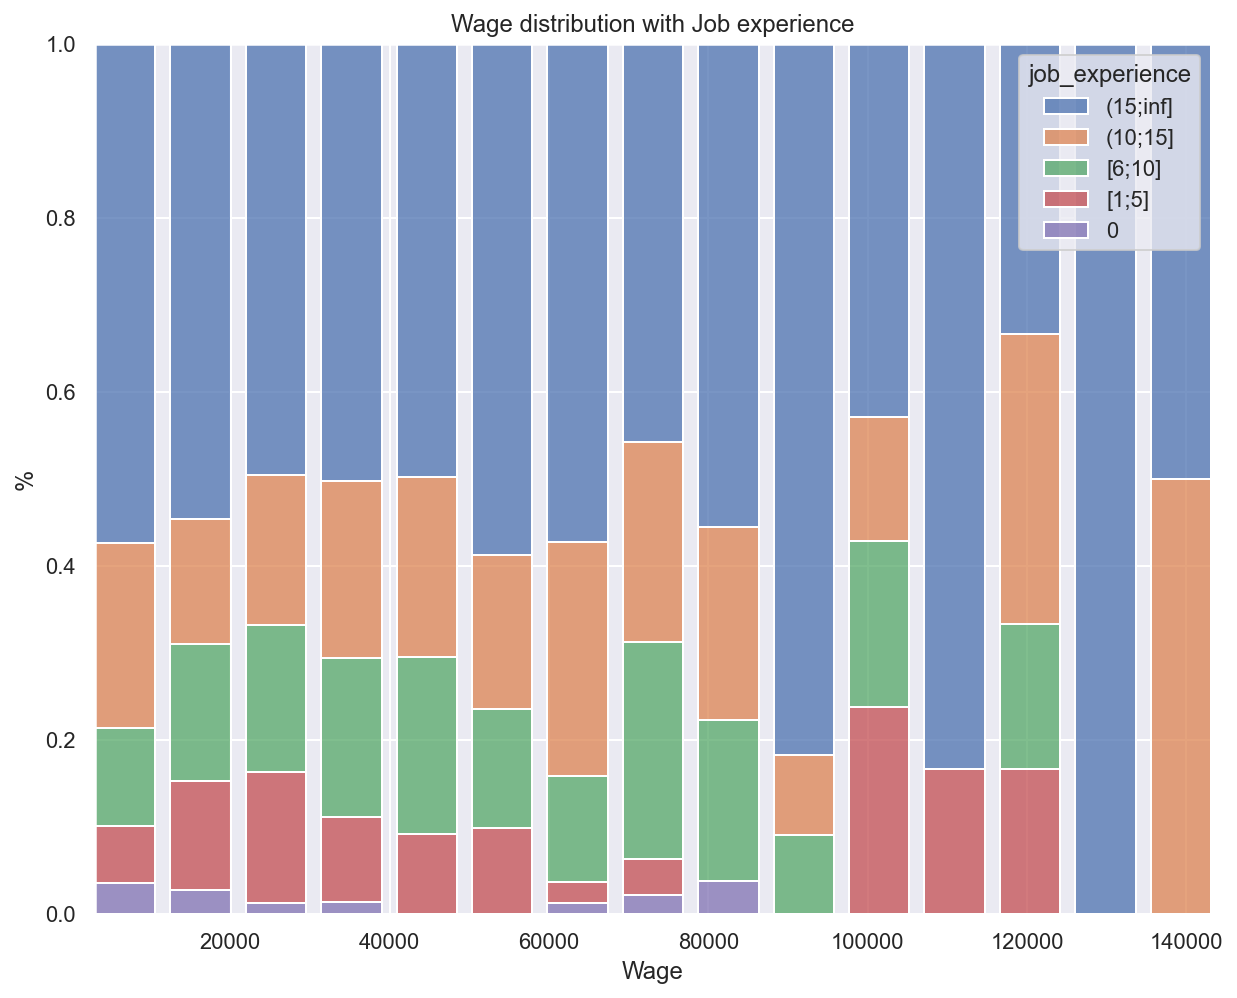

In [66]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 150000]

def fff(s):
    if s == 0:
        return 0
    if s > 0 and s <= 5:
        return 1
    if s >= 6 and s <= 10:
        return 2
    if s > 10 and s <= 15:
        return 3
    return 4
    
    

di = {0: "0",
      1: "[1;5]",
      2: "[6;10]",
      3: "(10;15]",
      4: "(15;inf]",
     }
df_tmp_1["job_experience"] = df_tmp["job_experience"].apply(lambda s: fff(s))
df_tmp_1 = df_tmp_1.replace({"job_experience": di})

sns.histplot(data=df_tmp_1, x="wage", hue="job_experience", multiple="fill", shrink=.8, bins=15)
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with Job experience")
plt.savefig('2. Wage distribution with Job experience.png')

<ipython-input-68-830f9bdb3f8a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_1["age"] = df_tmp["age"].apply(lambda s: fff(s))


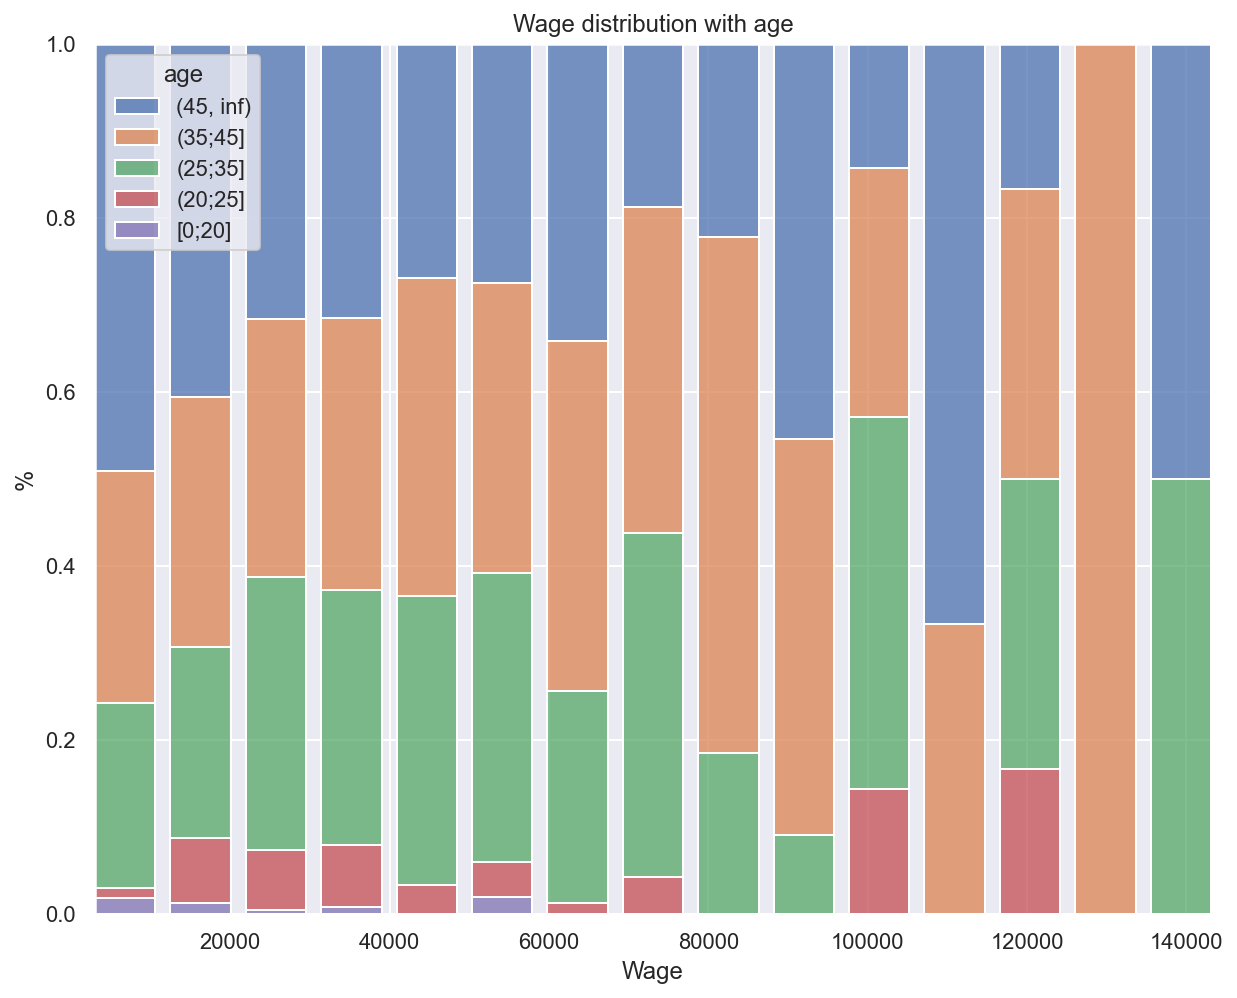

In [68]:
df_tmp_1 = df_tmp[df_tmp["wage"] < 150000]

def fff(s):
    if s > 0 and s <= 20:
        return 1
    if s >= 20 and s <= 25:
        return 2
    if s > 25 and s <= 35:
        return 3
    if s > 35 and s <= 45:
        return 4
    return 5
    
    

di = {1: "[0;20]",
      2: "(20;25]",
      3: "(25;35]",
      4: "(35;45]",
      5: "(45, inf)"
     }
df_tmp_1["age"] = df_tmp["age"].apply(lambda s: fff(s))
df_tmp_1 = df_tmp_1.replace({"age": di})

sns.histplot(data=df_tmp_1, x="wage", hue="age", multiple="fill", shrink=.8, bins=15)
plt.xlabel("Wage")
plt.ylabel("%")
plt.title("Wage distribution with age")
plt.savefig('2. Wage distribution with age.png')

In [720]:
conversion_education = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
df_tmp['education'] = df_tmp['education'].replace(conversion_education)

conversion_foregin_lan = {1: 0, 2: 1}
df_tmp['foregin_lan'] = df_tmp['foregin_lan'].replace(conversion_foregin_lan)

conversion_alc = {1: 0, 2: 1}
df_tmp['alc'] = df_tmp['alc'].replace(conversion_alc)

conversion_married = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
df_tmp['married'] = df_tmp['married'].replace(conversion_married)

conversion_internet_user = {1: 1, 2: 0}
df_tmp['internet_user'] = df_tmp['internet_user'].replace(conversion_internet_user)

conversion_job = {k: 0 for i, k in enumerate(df_tmp['job'])}
conversion_job[27] = 1
conversion_job[31] = 1
conversion_job[15] = 1
conversion_job[4] = 1
df_tmp['job'] = df_tmp['job'].replace(conversion_job)


conversion_psu = {k: 0 for i, k in enumerate(df_tmp['psu'])}
conversion_psu[2] = 1
df_tmp['psu'] = df_tmp['psu'].replace(conversion_psu)

conversion_supervisor = {1: 1, 2: 0}
df_tmp['supervisor'] = df_tmp['supervisor'].replace(conversion_supervisor)

conversion_ok= {1: 1, 2: 0}
df_tmp['ok'] = df_tmp['ok'].replace(conversion_ok)

conversion_vk= {1: 1, 2: 0}
df_tmp['vk'] = df_tmp['vk'].replace(conversion_vk)

conversion_facebook= {1: 1, 2: 0}
df_tmp['facebook'] = df_tmp['facebook'].replace(conversion_facebook)

conversion_twitter= {1: 1, 2: 0}
df_tmp['twitter'] = df_tmp['twitter'].replace(conversion_twitter)

conversion_male= {1: 1, 2: 0}
df_tmp['male'] = df_tmp['male'].replace(conversion_male)

In [721]:
df_tmp['age_25'] = (df_tmp['age'] <= 25).astype(int)
df_tmp['age_40'] = (df_tmp['age'] < 40) & (df_tmp['age'] > 25).astype(int)
df_tmp['age_old'] = (df_tmp['age'] >= 40).astype(int)

In [722]:
(df_tmp['age'] < 35) & (df_tmp['age'] > 25)

4        False
11       False
12       False
13       False
20       False
         ...  
12102    False
12104     True
12105    False
12115    False
12119    False
Name: age, Length: 1707, dtype: bool

In [723]:
df_tmp

,income,job_satisfaction,job,education,foregin_lan,alc,married,internet_user,kids,age,...,supervisor,work_time,ok,vk,facebook,twitter,male,age_25,age_40,age_old
4,30000.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,52.0,...,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0,False,1
11,90000.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,44.0,...,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0,False,1
12,29500.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,57.0,...,0.0,24.0,0.0,1.0,1.0,0.0,0.0,0,False,1
13,38000.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,51.0,...,0.0,24.0,0.0,0.0,0.0,0.0,1.0,0,False,1
20,25000.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,43.0,...,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12102,25000.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,50.0,...,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0,False,1
12104,46000.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,26.0,...,0.0,24.0,0.0,1.0,0.0,0.0,0.0,0,True,0
12105,68000.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,48.0,...,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0,False,1
12115,27000.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,59.0,...,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0,False,1


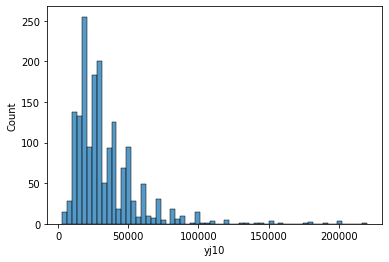

In [724]:
sns.histplot(df_w["yj10"])

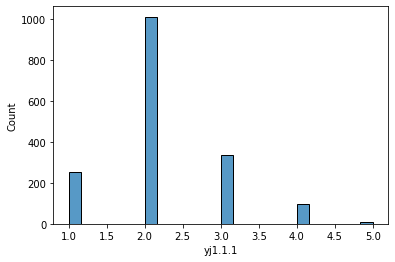

In [725]:
sns.histplot(df_w["yj1.1.1"])

In [728]:
#df_tmp["income"] = np.log(df_tmp["income"])


model = smf.ols('income ~  work_time + job_experience + age + education + foregin_lan + alc + job_satisfaction + job + psu + supervisor + ok + male', data=df_tmp)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     64.86
Date:                Tue, 26 Oct 2021   Prob (F-statistic):          1.00e-129
Time:                        16:41:28   Log-Likelihood:                -19242.
No. Observations:                1707   AIC:                         3.851e+04
Df Residuals:                    1694   BIC:                         3.858e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.316e+04   3573.668     12.078      0.000    3.62e+04    5.02e+04
work_time          339.9624    115.080      2.954      0.003     114.248     565.677
job_experience      79.8329     92.114      0.867      0.386    -100.837     260.502
age               -228.8965     98.931     -2.314      0.021    -422.936     -34.857
education         5259.2039   1042.661      5.044      0.000    3214.164    7304.244
foregin_lan      -5669.6089   1223.155     -4.635      0.000   -8068.663   -3270.555
alc              -2705.1901    982.589     -2.753      0.006   -4632.406    -777.974
job_satisfaction -3587.6727    614.893     -5.835      0.000   -4793.702   -2381.644
job               1.271e+04   1944.914      6.535      0.000    8894.726    1.65e+04
psu                2.15e+04   1663.414     12.923      0.000    1.82e+04    2.48e+04
supervisor        1.151e+04   1149.230     10.015      0.000    9255.366    1.38e+04
ok               -4422.8379    988.789     -4.473      0.000   -6362.215   -2483.461
male              9516.7471    983.708      9.674      0.000    7587.337    1.14e+04
==============================================================================
Omnibus:                     1170.030   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23391.274
Skew:                           2.940   Prob(JB):                         0.00
Kurtosis:                      20.155   Cond. No.                         404.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [656]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [ ]:
d = {"yj10":   "income",
    "yj1.1.1": "job_satisfaction",
    "y_diplom": "education",
    "yj4.1": "job",
    "yj260": "foregin_lan",
    "ym80": "alc",
    "yj322": "married",
    "yj123": "internet_user",
    "yj72.172": "kids",
    "y_age": "age",
    "yj161.3y": "job_experience", 
    "yj6": "supervisor",
    "yj6.1a": "work_time",
    "yj401.1a": "ok",
    "yj401.2a": "vk",
    "yj401.3a": "facebook",
    "yj401.5a": "twitter"}

In [710]:
COLUMNS_CATEGORIAL = ["education",]
COLUMNS_NUMERIC = ["age"]

In [711]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline 

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), COLUMNS_CATEGORIAL),
    ('scaling', StandardScaler(), COLUMNS_NUMERIC)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearRegression())
])

model = pipeline.fit(df_tmp[list(d.values())[1:]], df_tmp["income"])

In [712]:
model.score(df_tmp[list(d.values())[1:]], df_tmp["income"])

0.08323803791858653

In [658]:
reg.score(df_tmp[list(d.values())[1:]], df_tmp["income"])

0.25086795498765047